Import Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from lmfit import Model

# Load the .mqa file
path = 'C:/Natuurkunde/NSP2/Data/testmetinghelling_2.mqa' 
df = pd.read_csv(path, sep='\t', header=0)

Calculate a, t_0 and fitreport

In [12]:
# Extract time, x-position, and y-position
time = df['Time']
x_position = df['Point #1.X']
y_position = df['Point #1.Y']

# Adjust the data to start at (0, 0)
# Shift x and y so that the initial values are (0, 0)
x_position_adjusted = x_position - x_position.iloc[0]
y_position_adjusted = y_position - y_position.iloc[0]  

# Define the scaling factor 
known_distance_meters = 0.94  # known distance in meters
known_distance_pixels = 1052  # known distance in pixels
scaling_factor = known_distance_meters / known_distance_pixels

# Calculate s (distance in meters) for each time
s_pixels = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)
s_meters = s_pixels * scaling_factor

# Define the theoretical function for fitting
def theoretical_s(t, a, t_0):
    return 0.5 * a * (t-t_0)**2

# Use lmfit Model to define the model and fit the data
model = Model(theoretical_s)
params = model.make_params(a=1, t_0=0) # Initial guess for parameters

# Fit the model to the data
result = model.fit(s_meters, params, t=time)

# Print the fit report, which includes the fitted parameters and reduced chi-squared
print(result.fit_report())


[[Model]]
    Model(theoretical_s)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 194
    # variables        = 2
    chi-square         = 0.00185818
    reduced chi-square = 9.6780e-06
    Akaike info crit   = -2237.86740
    Bayesian info crit = -2231.33168
    R-squared          = 0.99988394
[[Variables]]
    a:    3.10211029 +/- 0.00665307 (0.21%) (init = 1)
    t_0:  0.04487365 +/- 6.5247e-04 (1.45%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, t_0) = +0.9681


Error calculation

In [13]:
# x and y positions in pixels
x_position = x_position_adjusted  
y_position = y_position_adjusted  

# Define uncertainties in x and y (in pixels)
delta_x = 1
delta_y = 1

# Calculate s (distance in pixels) for each (x, y) point
s_pixels = np.sqrt(x_position**2 + y_position**2)

# Calculate partial derivatives
ds_dx = x_position / s_pixels
ds_dy = y_position / s_pixels

# Calculate the error on distance using the provided formula
delta_s_pixels = np.sqrt((ds_dx * delta_x)**2 + (ds_dy * delta_y)**2)

# Display results
#for i, (s, error) in enumerate(zip(s_pixels, delta_s_pixels)):
    #print(f"Point {i+1}: Distance (s) = {s:.2f} pixels, Error (δs) = {error:.2f} pixels")


Plot Graph

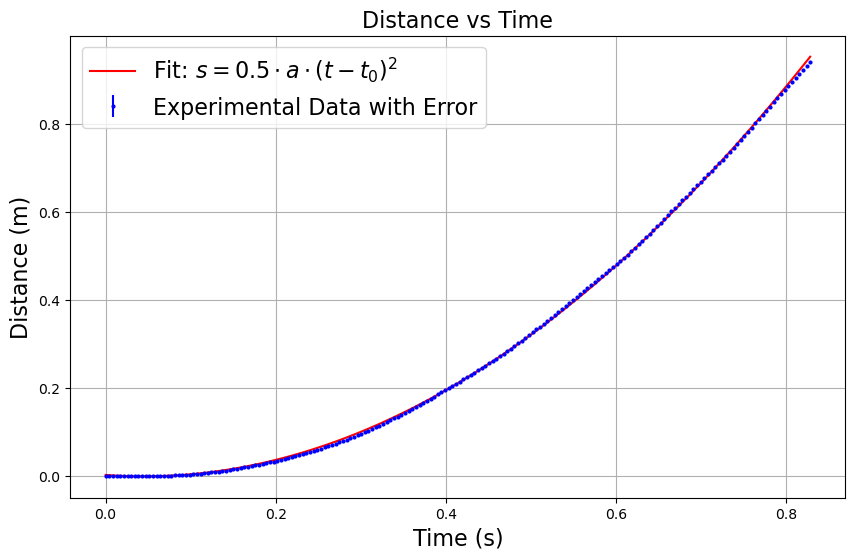

In [14]:
# Convert `delta_s_pixels` to meters using the scaling factor 
delta_s_meters = delta_s_pixels * scaling_factor  

plt.figure(figsize=(10, 6))
plt.errorbar(time, s_meters, yerr=delta_s_meters, fmt='bo', markersize=2, label='Experimental Data with Error')
plt.plot(time, result.best_fit, 'r-', label=r'Fit: $s = 0.5 \cdot a \cdot (t - t_0)^2$')
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Distance (m)', fontsize = 16)
plt.title('Distance vs Time', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
plt.savefig('s_vs_t_metfout.png')
plt.show()
